In [3]:
from autogluon.tabular import TabularPredictor

In [4]:
import pandas as pd

In [11]:
# Reading train, test csv files
train = pd.read_csv("data/train.csv")
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test = pd.read_csv("data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
#Converting "sex" variable into dummy/indicator variables.

train_updated = pd.get_dummies(data=train, columns=["Sex"])
train_updated

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [16]:
#Converting "sex" variable into dummy/indicator variables.

test_updated = pd.get_dummies(data=test, columns=["Sex"])
test_updated

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,S,0,1


In [21]:
#Selecting features to be used for a model
features = ["Survived","Age", "Sex_female", "Pclass", "SibSp"]

In [22]:
#General info
train_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Sex_female   891 non-null    uint8  
 12  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(2)
memory usage: 78.4+ KB


In [23]:
predictor = TabularPredictor(label="Survived", 
                             eval_metric="roc_auc").fit(train_data=train_updated[features], 
                                                                        time_limit=120, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230207_214042/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230207_214042/"
AutoGluon Version:  0.5.2
Python Version:     3.9.7
Operating System:   Darwin
Train Data Rows:    891
Train Data Columns: 4
Label Column: Survived
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available

Detailed Traceback:
Traceback (most recent call last):
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1126, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1083, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, **model_fit_kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/abstract/abstract_model.py", line 587, in fit
    out = self._fit(**kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 154, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/ensembl

	Fitting 8 child models (S4F1 - S4F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.8662	 = Validation score   (roc_auc)
	62.23s	 = Training   runtime
	0.19s	 = Validation runtime
Completed 4/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 119.95s of the 20.77s of remaining time.
	0.8815	 = Validation score   (roc_auc)
	0.87s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 100.12s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230207_214042/")


In [24]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.881504       0.237873  72.293231                0.000991           0.872838            2       True         10
1          CatBoost_BAG_L1   0.879997       0.030827   9.177783                0.030827           9.177783            1       True          5
2   NeuralNetFastAI_BAG_L1   0.868860       0.205853  23.411912                0.205853          23.411912            1       True          8
3    NeuralNetTorch_BAG_L1   0.866155       0.194813  62.232526                0.194813          62.232526            1       True          9
4    ExtraTreesGini_BAG_L1   0.840851       0.078163   0.338454                0.078163           0.338454            1       True          6
5    ExtraTreesEntr_BAG_L1   0.837922       0.079431   0.337712                0.07943

/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6977945014326952,
  'KNeighborsDist_BAG_L1': 0.6760377720256927,
  'RandomForestGini_BAG_L1': 0.8331629011813078,
  'RandomForestEntr_BAG_L1': 0.8329844800221562,
  'CatBoost_BAG_L1': 0.8799971239574346,
  'ExtraTreesGini_BAG_L1': 0.8408509890390823,
  'ExtraTreesEntr_BAG_L1': 0.8379216864261443,
  'NeuralNetFastAI_BAG_L1': 0.8688604480235198,
  'NeuralNetT

<AxesSubplot: xlabel='model'>

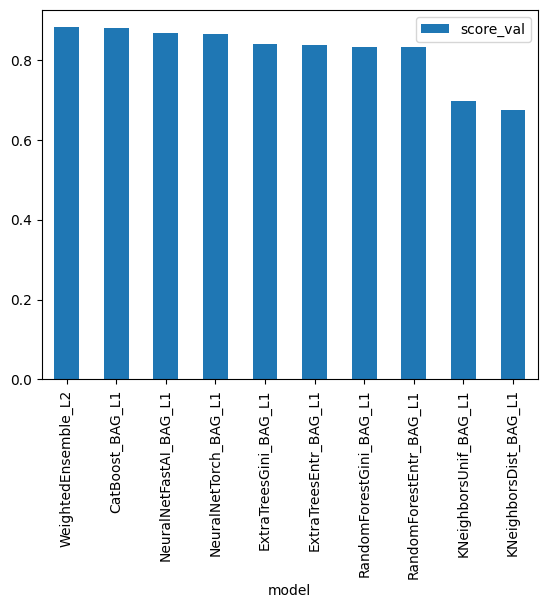

In [25]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [26]:
#Creating predictions from test dataset
predictions = predictor.predict(test_updated)
predictions.head()

0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

In [28]:
#Setting predictions to submission dataframe

submission = pd.read_csv("data/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [30]:
submission["Survived"] = predictions
submission.to_csv("output/submission_autogluon.csv", index=False)